In [19]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

The classes are:

    Label	Description
        0	airplane
        1	automobile
        2	bird
        3	cat
        4	deer
        5	dog
        6	frog
        7	horse
        8	ship
        9	truck
    Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 1)
#x_train = np.expand_dims(x_train, -1) ## Bu kod input_shape 32,32,3 olmasına rağmen bu 32,32,1 yaptı bundan dolayı kaldırdım.
#x_test = np.expand_dims(x_test, -1) ## Bu kod input_shape 32,32,3 olmasına rağmen bu 32,32,1 yaptı bundan dolayı kaldırdım.
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 10))
((10000, 32, 32, 3), (10000, 10))


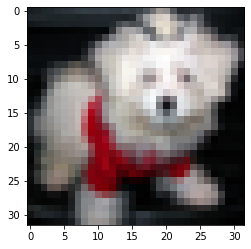

In [4]:
plt.imshow(x_train[1423],cmap='gray')

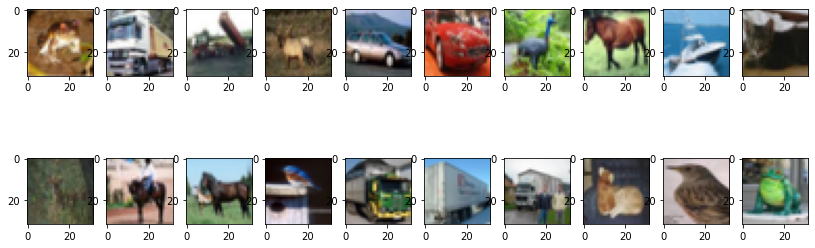

In [5]:
### Büşra Hanım'ın hazırladığı data göstermeden aldım. Fakat plt.imshow input_shape'i 32,32,1 olan image i çalıştırmıyor. hata veriyor
plt.figure(figsize=(14,5))
x, y = 10, 2 
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

In [7]:
from keras.optimizers import SGD,Adam


In [8]:
learn_rate=000.1
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

C:\Users\bolbahadir\Anaconda3\envs\env_full\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\bolbahadir\Anaconda3\envs\env_full\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
batch_size = 52
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
962/962 [==============================] - 30s 31ms/step - loss: 1.5990 - accuracy: 0.4240 - val_loss: 1.3323 - val_accuracy: 0.5299
Epoch 2/15
962/962 [==============================] - 29s 30ms/step - loss: 1.2990 - accuracy: 0.5428 - val_loss: 1.1954 - val_accuracy: 0.5921
Epoch 3/15
962/962 [==============================] - 29s 30ms/step - loss: 1.1845 - accuracy: 0.5875 - val_loss: 1.0838 - val_accuracy: 0.6271
Epoch 4/15
962/962 [==============================] - 29s 30ms/step - loss: 1.1108 - accuracy: 0.6123 - val_loss: 1.0013 - val_accuracy: 0.6497
Epoch 5/15
962/962 [==============================] - 29s 30ms/step - loss: 1.0560 - accuracy: 0.6316 - val_loss: 0.9743 - val_accuracy: 0.6643
Epoch 6/15
962/962 [==============================] - 29s 30ms/step - loss: 1.0262 - accuracy: 0.6440 - val_loss: 0.9458 - val_accuracy: 0.6743
Epoch 7/15
962/962 [==============================] - 29s 30ms/step - loss: 0.9917 - accuracy: 0.6559 - val_loss: 0.9418 - val_accuracy:

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8480522632598877
Test accuracy: 0.7032999992370605


In [11]:
# Malaria Disease da kullandığım mmodelin aynısı
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))




In [12]:
batch_size = 138
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/15
363/363 [==============================] - 20s 51ms/step - loss: 2.0171 - accuracy: 0.2362 - val_loss: 1.7173 - val_accuracy: 0.3845
Epoch 2/15
363/363 [==============================] - 18s 51ms/step - loss: 1.7006 - accuracy: 0.3652 - val_loss: 1.5365 - val_accuracy: 0.4419
Epoch 3/15
363/363 [==============================] - 19s 51ms/step - loss: 1.5910 - accuracy: 0.4118 - val_loss: 1.4486 - val_accuracy: 0.4902
Epoch 4/15
363/363 [==============================] - 19s 51ms/step - loss: 1.5253 - accuracy: 0.4442 - val_loss: 1.3602 - val_accuracy: 0.5112
Epoch 5/15
363/363 [==============================] - 19s 51ms/step - loss: 1.4671 - accuracy: 0.4680 - val_loss: 1.3249 - val_accuracy: 0.5338
Epoch 6/15
363/363 [==============================] - 19s 52ms/step - loss: 1.4244 - accuracy: 0.4846 - val_loss: 1.2705 - val_accuracy: 0.5561
Epoch 7/15
363/363 [==============================] - 18s 51ms/step - loss: 1.3916 - accuracy: 0.4965 - val_loss: 1.2407 - val_accuracy:

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

### Aşağıdaki model kaggle daki bir örnekten alındı. Benim yaptıklarım %69 un üzerine çıkmıyor. Burada sonucu etkileyen BatchNormalization olabiiir. 

    https://www.kaggle.com/code/vivek468/very-basic-cifar-10-data-cnn

In [14]:

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
batch_size=30
epochs=50

model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
1667/1667 [==============================] - 315s 189ms/step - loss: 8.3977 - accuracy: 0.4249 - val_loss: 5.9806 - val_accuracy: 0.5656
Epoch 2/50
1667/1667 [==============================] - 315s 189ms/step - loss: 4.7269 - accuracy: 0.5767 - val_loss: 3.6207 - val_accuracy: 0.6132
Epoch 3/50
1667/1667 [==============================] - 319s 191ms/step - loss: 2.8866 - accuracy: 0.6481 - val_loss: 2.2822 - val_accuracy: 0.6866
Epoch 4/50
1667/1667 [==============================] - 317s 190ms/step - loss: 1.9321 - accuracy: 0.6935 - val_loss: 1.6627 - val_accuracy: 0.7028
Epoch 5/50
1667/1667 [==============================] - 315s 189ms/step - loss: 1.4287 - accuracy: 0.7261 - val_loss: 1.2779 - val_accuracy: 0.7391
Epoch 6/50
1667/1667 [==============================] - 320s 192ms/step - loss: 1.1622 - accuracy: 0.7490 - val_loss: 1.0563 - val_accuracy: 0.7669
Epoch 7/50
1667/1667 [==============================] - 316s 190ms/step - loss: 1.0139 - accuracy: 0.7672 - val_

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0693731307983398
Test accuracy: 0.8320000171661377


In [21]:
predictions = model.predict(x_test)

313/313 [==============================] - 11s 34ms/step


In [23]:
predictions

array([[2.3546625e-07, 3.2678611e-06, 4.4823548e-05, ..., 1.0969587e-05,
        5.1343545e-06, 3.0903745e-06],
       [4.7865774e-07, 7.7419600e-06, 1.1919634e-12, ..., 3.5286795e-15,
        9.9999082e-01, 9.3163254e-07],
       [1.5774793e-04, 3.5706806e-04, 1.7399855e-09, ..., 1.7598513e-09,
        9.9927419e-01, 2.1097476e-04],
       ...,
       [5.5692267e-11, 1.1743750e-10, 5.4209795e-06, ..., 7.4696654e-06,
        9.3134078e-10, 1.8169947e-09],
       [7.9641649e-03, 9.8827863e-01, 3.2943826e-05, ..., 2.7629601e-06,
        1.4674006e-03, 1.5536509e-03],
       [7.2975090e-12, 4.4943500e-11, 3.7245883e-08, ..., 9.9973673e-01,
        4.1488040e-13, 8.7805392e-13]], dtype=float32)

#### Aşağıdaki örnekte predictioin kısmına x_test da tahmin ettiği örnekleri atıyor. 
#### Subplot ile 10 a 10 luk figürun içine
    plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary) # burada n nolu x_test deki resmi 32,32,-1 şeklinde matrix e çeviriyor. gösteriyor.
     # burada n nolu prediction ın 

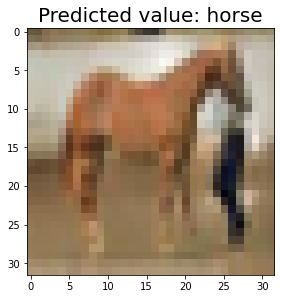

In [28]:

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1) 
n = 543
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary) 
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

1/1 [==============================] - 0s 22ms/step


'frog'

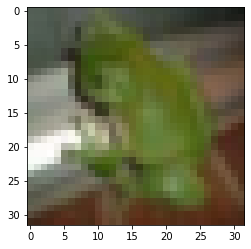

In [63]:
# Büşte hanımın ödevinden yardım alındı. Labels kısmında hata veriyordu. çünkü modele history=model.fit demediğim için labels ı ayrıca tanıtmam gerekti.
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
image_number = 7
plt.imshow(x_test[image_number])
n = np.array(x_test[image_number])
p = n.reshape(1, 32, 32, 3)
predicted_label = labels[model.predict(p).argmax()]
predicted_label

In [ ]:

y_test=y_test.argmax(1)

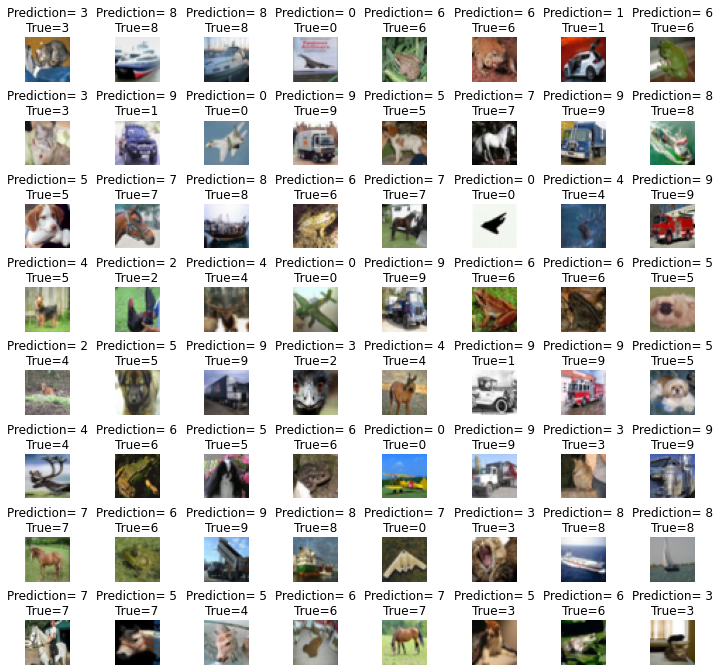

In [60]:
# https://www.kaggle.com/code/mielek/learning-cnn-with-keras-using-cifar-10/notebook yardım alındı. predictions kısmı hata veriyordu [] olarak düzeltildi.

L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predictions[i].argmax(),y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    

In [56]:
y_test[i]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

313/313 [==============================] - 10s 33ms/step


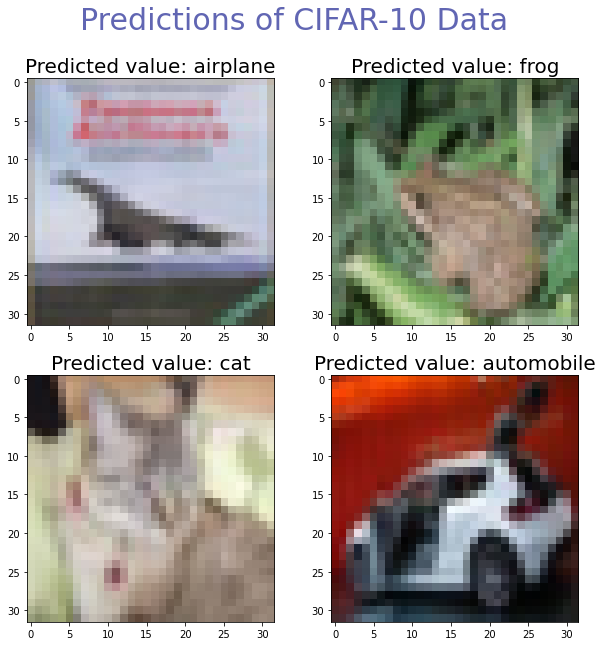

In [39]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

In [40]:
predictions

array([[2.3546625e-07, 3.2678611e-06, 4.4823548e-05, ..., 1.0969587e-05,
        5.1343545e-06, 3.0903745e-06],
       [4.7865774e-07, 7.7419600e-06, 1.1919634e-12, ..., 3.5286795e-15,
        9.9999082e-01, 9.3163254e-07],
       [1.5774793e-04, 3.5706806e-04, 1.7399855e-09, ..., 1.7598513e-09,
        9.9927419e-01, 2.1097476e-04],
       ...,
       [5.5692267e-11, 1.1743750e-10, 5.4209795e-06, ..., 7.4696654e-06,
        9.3134078e-10, 1.8169947e-09],
       [7.9641649e-03, 9.8827863e-01, 3.2943826e-05, ..., 2.7629601e-06,
        1.4674006e-03, 1.5536509e-03],
       [7.2975090e-12, 4.4943500e-11, 3.7245883e-08, ..., 9.9973673e-01,
        4.1488040e-13, 8.7805392e-13]], dtype=float32)